# Influence d'une variable aléatoire sur une autre

In [1]:
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
np.set_printoptions(precision=2,suppress=True, linewidth=100)

## Introduction

### Variable aléatoire et data

Les héros de ce cours sont deux variables aléatoires $X$ et $Y$. Elles prennent leurs valeurs dans $\mathbb R$.  Cependant, de nombreuses notions se généralisent si  $X$ et $Y$ prennent leurs valeurs dans $\mathbb R^n$.

Habituellement une v.a à valeur dans $\mathbb R^n$ est appelée vecteur aléatoire.  On utilisera souvent le vecteur aléatoire $Z=(X,Y)$ qui est à valeur dans $\mathbb R^2$.



Pour le traitement de donnée, nous allons simplement avoir besoin de data $\mathtt X=(\mathtt X_i)$ et $\mathtt Y=(\mathtt Y_i)$ qui sont des tirages aléatoires indépendants de $X$ et $Y$.  Nous les notons avec une police qui rappelle celle des programmes informatiques, car en pratiques, c'est avec des data que l'on fait les calculs.

Remarque: Les statisticiens appellent "échantillon" une suite de copies indépendantes des v.a. $X,Y$. Les data-scientists (comme nous) ont surtout besoin de data: qui sont donc la "réalisation" d'un échantillon.


### L'exemple concret 1

In [3]:
def simulate_concrete_1(size):
    X=np.random.normal(size=size)
    Y=X*np.random.exponential(size=size)
    return X,Y

In [4]:
X,Y=simulate_concrete_1(5000)
#voici nos réalisations:
X,Y

(array([-0.6 ,  0.04, -0.07, ..., -0.72, -0.44, -0.72]),
 array([-0.72,  0.01, -0.03, ..., -0.68, -0.42, -0.19]))


Un 'pairplot' ou un histogramme de $\mathtt X,\mathtt Y$ permet d'avoir une idée de la loi de $X,Y$.

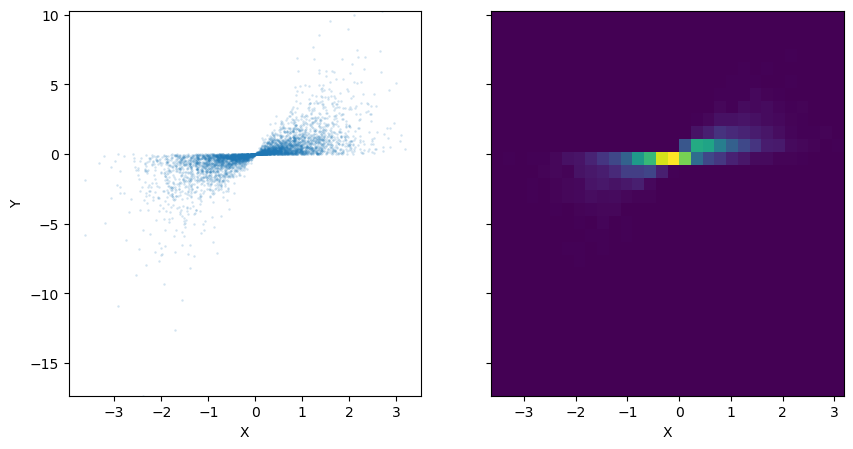

In [5]:
def plot_simu(X,Y):
    fig,(ax0,ax1)=plt.subplots(1,2,sharey="all",figsize=(10,5))
    ax0.set_xlabel("X")
    ax1.set_xlabel("X")
    ax0.set_ylabel("Y")
    ax0.scatter(X,Y,s=3,alpha=0.2,linewidths=0)
    ax1.hist2d(X,Y,bins=30)
plot_simu(X,Y)

Sur cet exemple,  on voit que $X,Y$ "s'influencent" mutuellement sans pour autant qu'il existe un lien de causalité entre eux: il n'y a pas de fonction $f$ telle que $Y=f(X)$ ou $X=f(X)$.

Le but de ce cours est de quantifier cette notion d'influence, notamment à l'aide de la notion de corrélation.

### Corrélation dans le langage de tous les jours

Dans le langage courant, deux phénomènes sont "corrélées" quand ils ont tendance à se produire simultanément. Par exemple la pluie est corrélée à la crue des rivières.


Quand on peut quantifier les phénomènes par deux scores, alors le mot corrélé signifie que les deux scores ont tendance à être simultanément grand, ou bien simultanément petit: Par exemple: La quantité de pluie est corrélée avec le niveau des rivières.

On parle parfois d'anti-corrélation: Le nombre de jours de sécheresse est anti-corrélé avec le niveau des rivières.

Les mathématiciens parlent plutôt de corrélation positive, et de corrélation négative, car ils ont inventé un coéfficient qui est positif pour les phénomènes corrélés et négatif pour les phénomènes anti-corrélés.


### Ne pas confondre


Attention à ne pas confondre 'corrélation' et 'causalité'. Voici une petite histoire que vous pouvez raconter autour de vous:

"On a fait passer un test de mathématique à tous les enfants d'une école primaire, du CP au CM2. En observant les résultats du test, le directeur d'école en déduit que plus les enfants ont de grands pieds, et plus ils sont forts en math."





#### ♡


***À vous:*** Le directeur n'est pas idiot, il confond simplement causalité et corrélation. Expliquez.


## Loi jointe et loi conditionnelle

### Définition de la loi jointe

Les lois de $X$ et de $Y$ sont les mesures sur $\mathbb R$ définies par:
\begin{align}
Loi_X[A] &= \mathbf P[X\in A]\\
Loi_Y[B] &= \mathbf P[Y\in B]
\end{align}
Mais ces deux lois ne contiennent pas d'information sur l'interaction entre $X$ et $Y$. C'est la loi jointe qui contient cette information:    
$$
\forall C\subset \mathbb R^2\qquad Loi_{X,Y}[C] = \mathbf P[(X,Y) \in C]
$$
En particulier quand $C=A\times B$:
$$
Loi_{X,Y}[A\times B] = \mathbf P[X\in A , Y\in B]
$$
(la virgule dans les proba doit se traduire par "et"). Remarquons que la loi jointe permet de retrouver les lois individuelles (aussi appelées lois marginales):
\begin{align}
Loi_X[A] &= Loi_{X,Y}[A\times \mathbb R]\\
Loi_Y[B] &= Loi_{X,Y}[\mathbb R \times B]
\end{align}

### Notations infinitésimales

Il est  pratique de considérer un élément infinitésimal $dx\times dy \subset \mathbb R^2$, qu'on note aussi $dx\,dy$, et d'écrire:
$$
Loi_{X,Y}(dx\,dy) = \mathbf P[X\in dx, Y \in dy]
$$
La loi jointe  permet de calculer des espérances: pour toute fonction $\phi:\mathbb R^2\to \mathbb R$:
$$
\mathbf E[\phi(X,Y)] = \int_{\mathbb R^2} \phi(x,y) Loi_{X,Y}(dx\,dy)
$$

Cette loi jointe admet une densité $f_{X,Y}$ quand on peut écrire
$$
Loi_{X,Y}(dx\,dy) = f_{X,Y}(x,y) \, dx  dy
$$
et donc
$$
\mathbf E[\phi(X,Y)]= \int_{\mathbb R^2} \phi(x,y) f_{X,Y}(x,y) \, dx dy
$$





### Définition de la loi conditionnelle

Pour mieux décrire l'influence de $X$ sur $Y$, il est  pratique de considérer la loi de $Y$ sachant $X=x$.
$$
Loi_{Y|X=x}(dy)
$$
Comme la notation l'indique, c'est une mesure en son argument $dy$ et une fonction en son argument $x$. Elle permet de retrouver la loi jointe grâce à l'équation  de "reconstruction":
$$
Loi_{X,Y}(dx\,dy) = Loi_{Y|X=x}(dy)\ Loi_{X}(dx)
$$


Autre notation:
$$
\mathbf P[X\in dx, Y\in dy] = \mathbf P[Y\in dy / X=x] \ \mathbf P[X\in dx]
$$
Mais attention, on ne peut pas écrire brutalement:
$$
\mathbf P[Y\in dy / X=x] = {\mathbf P[X\in dx, Y\in dy]  \over \mathbf P[X\in dx] }
$$
car ça n'a pas  de sens de diviser des mesures (ou alors, il faut préciser le sens de cette division).


Mais dans le cas particulier où la loi jointe admet une densité $f_{X,Y}$ alors les lois marginales  admettent une densité, notamment celle de $X$:
$$
f_X(x)= \int f_{X,Y}(x,y) dy
$$
et la loi conditionnelle admet la densité suivante:
$$
Loi_{Y|X=x}(dy) = {f_{X,Y}(x,y) \over f_{X}(x) } dy
$$
(diviser des fonctions cela a du sens. Et de plus, dans cette équation, la convention $\frac 00=0$ a du sens, et régle le problème de la division par $0$).


*Point technique:*  La loi conditionnelle n'est pas tout à fait unique: En effet, si on considère une variante  $Loi2_{Y|X=x}$ qui diffère de $Loi_{Y|X=x}$ uniquement sur un ensemble de $x$ qui est négligeable pour $Loi_{X}$, alors l'équation de reconstruction est toujours valide, et donc $Loi2_{Y|X=x}$ est aussi légitime que $Loi_{Y|X=x}$.

###  Exemple concret 2

Nous simulons un couple de variable aléatoire $X,Y$ comme ceci

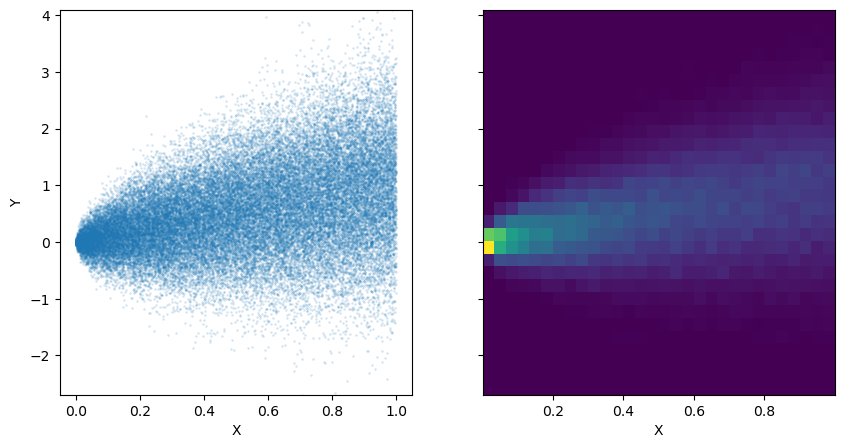

In [6]:
def simulate_concrete_2(size):
    X=np.random.uniform(0,1,size=size)
    Y=np.random.normal(loc=X,scale=np.sqrt(X))
    return X,Y

X,Y=simulate_concrete_2(50_000)
plot_simu(X,Y)


* $X$ suit une loi uniforme sur $[0,1]$
* Sachant $X=x$, la v.a $Y$ suit une loi normale de moyenne $x$ et d'écart type $\sqrt x$.

Réécrivons cela en notation mathématique:
$$
Loi_X(dx) = 1_{[0,1]}(x) \, dx
$$
$$
Loi_{Y|X=x}(dy)  = {1\over \sqrt{2\pi x}}\exp(-\frac 12 { (y-x)^2 \over x }) dy
$$
Par conséquent:
$$
Loi_{X,Y}(dx\,dy)={1\over \sqrt{2\pi x}}\exp(-\frac 12 { (y-x)^2 \over x })1_{[0,1]}(x) \, dx dy
$$


#### ♡♡



Pour l'exemple concret 1 on a:

    X=np.random.normal(size=size)
    Y=X*np.random.exponential(size=size)

Donc en notation mathématique:
$$
Loi_X(dx) = {1\over \sqrt{2\pi}}\color{red}{\square \square \square}
$$

Si $x>0$:
$$
Loi_{Y|X=x}(dy)  = {1\over x} \color{red}{\square \square \square} 1_{y>0}
$$
Si $x < 0$:
$$
Loi_{Y|X=x}(dy)  = {1\over |x|} \color{red}{\square \square \square} 1_{y < 0}
$$

Pas besoin de traiter le cas $x=0$ car il est négligeable au regard de $Loi_X$.

### Conditionnements en cascade

Notez que dans l'exemple concret 2, on construit la loi jointe de $(X,Y)$ à partir de la loi conditionnelle.  C'est une situation très fréquente en modélisation. Et même très souvent on a plusieurs étages de conditionnements.

* Voici un exemple à 2 étages:  On veut modéliser la taille d'une espèce de poissons: On note $X$ la température de l'eau. On suppose que cette température suit une loi exponentielle de paramètre 1. Puis sachant $X=x$, la taille du poisson suit une loi normale d'espérance $(x+10)^2$ et d'écart type $\sqrt x$.

* Voici un exemple à 3 étages:  Toujours pour des tailles de poissons: On note $P$ une v.a. qui représente la profondeur de l'endroit où vit le poisson. $P$ suit une loi Gamma de paramètre 1. Puis sachant $P=p$, la température de l'eau suit une loi exponentielle de paramètres $p$. Ensuite, sachant $X=x$, la taille du Poisson suit une loi normale d'espérance $(x+10)^2$ et d'écart type $\sqrt x$.

* Voici un exemple à 4 étages: On note $O$ une v.a discrète qui décrit l'océan où vit le poisson: $O=1$ si s'il vit dans l'océan atlantique,  $O=2$ s'il vit dans l'océan pacifique, etc. On suppose la proba que $O=k$ est proportionnelle à la taille de l'océan.  Puis sachant $O=k$, la profondeur de l'eau $P$ suit une loi gamma dont le paramètre dépend de $k$. Ensuite, on décrit la loi conditionnelle de la température de l'eau, et pour finir celle de la taille du poisson.








## Indépendance


### Définition et premières caractérisations

> ***Définition:*** On dit que $X$ et $Y$ sont indépendantes quand
$$
\forall A,B \qquad \mathbf P[X\in A,Y\in B]= \mathbf P[X\in A]\, \mathbf P[Y\in B]
$$


Remarque: quand on parle avec des non-probabilistes, il est préférable de dire "statistiquement indépendant", car le mot "indépendant" à plein de sens, y compris en math. Par exemple "linéairement indépendant".



L'équation ci-dessus s'écrit aussi:
$$
Loi_{X,Y}(dx\,dy) = Loi_X(dx) Loi_Y(dy)
$$
Et quand cette loi jointe admet une densité $f_{X,Y}$, cela équivaut à dire que celle fonction peut s'écrire
$$
f_{X,Y}(x,y) = g(x)h(y)
$$
Et en normalisant:
* ${g\over \int g}$ est nécessairement la densité de $X$
* ${h\over \int h}$ est nécessairement la densité de $Y$



Voici la caractérisation la plus classique de l'indépendance: le fait de pouvoir 'spliter' les espérances:

> ***Proposition:*** $X$ et $Y$ sont indépendantes ssi
$$
\forall \phi,\psi\qquad \mathbf E[\phi(X)\psi(Y)]=\mathbf E[\phi(X)]\mathbf E[\psi(Y)]
$$


###  Caractérisation par la loi conditionnelle

Je pense que vous connaissiez bien les caractérisations de l'indépendance de la section précédente. Mais la suite est moins connue:


> ***Proposition:*** Les trois points suivants sont équivalents:
* $X$ et $Y$ sont indépendantes
* $Loi_{Y|X=x}(dy)$ ne dépend pas de $x$ (c'est toujours la même mesure).
* $Loi_{X|Y=y}(dx)$ ne dépend pas de $y$ (c'est toujours la même mesure).


À mon avis, c'est la bonne manière de comprendre d'indépendance probabiliste: Le fait que $X$ prennent la valeur $x$ ou $x'$  n'influe pas sur la proba que $Y$ soit dans $dy$ ou $dy'$. Et c'est idem en inversant $X$ et $Y$ dans la phrase précédent.














#### ♡♡

***À vous:*** Démontrez cette proposition dans le cas particulier où $X,Y$ admet une densité $f_{X,Y}$.  

#### ♡

***À vous:*** Dans les exemples concrets 1 et 2, comment peut-on voir immédiatement qu'il n'y a pas indépendances entre $X$ et $Y$ ?

### Lien avec la causalité

On dit qu'il y a un lien causal de $X$ vers $Y$ quand il existe une fonction $f$ telle que $Y=f(X)$. On comprend intuitivement que cela empêche l'indépendance entre $X$ et $Y$.


> ***Proposition:*** Prenons deux v.a $X,Y$ non-constantes. S'il y a un lien causal de $X$ vers $Y$ ou bien de $Y$ vers  et si $X$  alors, elles ne sont pas indépendantes.


*Démo:*  Supposons par exemple que $Y=f(X)$ alors
$$
Loi_{Y|X=x}(dy) = \delta_{f(x)}(dy)
$$
où le delta est la mesure de Dirac. Cette quantité varie avec $x$ donc on est en situation de non-indépendance. Et la démo est la même si on a $X=f(Y)$. $\square$


*Remarque:* Un v.a constante est indépendante avec n'importe quelle autre v.a. Dans la démo précédente, on utilise bien le fait que $X$ et $Y$ ne sont pas constantes.


### Non-causal et non-indépendant

Mais attention: ce n'est pas parce qu'il n'y a pas de lien causal qu'il y a forcément indépendance.

Un contre-exemple peut facilement se construire en observant les supports de loi jointe: Le fait d'avoir un lien causal de $X$ vers $Y$ équivaut à dire que le support de $Loi_{X,Y}$ est le graphe d'une fonction. Situation opposée: Si $X$ et $Y$ sont indépendantes, alors le support de la loi jointe est un rectangle (éventuellement non borné). Ainsi, dans toutes les situations où le support de la loi jointe n'est ni un graph, ni un rectangle il y a non-causalité et non-indépendance.  





## Covariance




### Définition

> ***Définition:*** Soit $X$ et $Y$ deux variables aléatoires. Leur covariance est définie par:
$$
cov(X,Y)= \mathbf E [ (X-\mathbf E(X))(Y-\mathbf E(Y)) ]
$$


***À vous:*** Il y a une seconde formule bien pratique pour calculer la covariance, que l'on obtient simplement en développant le produit dans l'espérance ci-dessus:

#### ♡


$$
cov(X,Y)=  \mathbf E [XY] -\color{red}{\square \square \square}
$$

###  Indépendante ⇒ non-corrélée


#### ♡



> ***Proposition:*** Si $X$ et $Y$ sont indépendantes, on a:
$$
cov(X,Y) =\color{red}{\square \square \square}
$$

###   Non-corrélée $\not \Rightarrow$ indépendante



Contre-exemple pour la réciproque: Considérons n'importe quelle figure $F\subset \mathbb R^2$ avec une symétrie selon l'axe des abscisses. Considérons $X,Y$ un point tiré uniformément sur cette figure. Alors $cov(X,Y)=0$.

En effet, la symétrie implique que la loi de $(X,Y)$ est égale à la loi de $(-X,Y)$. En utilisant la bilinéarité de la covariance:
$$
cov(X,Y)= cov(-X,Y) = -cov(X,Y) = 0
$$
Or en prenant $F$ qui n'est pas un rectangle, il n'y a pas indépendance entre $X$ et $Y$.


In [7]:
def simulate_one_unif_in_F():
    go_on=True
    while go_on:
        X=np.random.uniform(-1.5,1.5)
        Y=np.random.uniform(-2.5,2.5)
        go_on = -1<X<1 and -1<Y<1
    return X,Y

def simulate_several_unif_in_F(size):
    Xs,Ys=[],[]
    for _ in range(size):
        X,Y=simulate_one_unif_in_F()
        Xs.append(X)
        Ys.append(Y)
    return np.array(Xs),np.array(Ys)

X,Y=simulate_several_unif_in_F(10)
X,Y

(array([ 1.42,  0.92, -1.23, -1.31,  0.54, -0.51,  0.35,  1.32,  0.41,  0.41]),
 array([ 0.75,  1.68,  0.25, -1.01,  2.42, -2.36,  2.07,  0.6 ,  1.41,  2.35]))

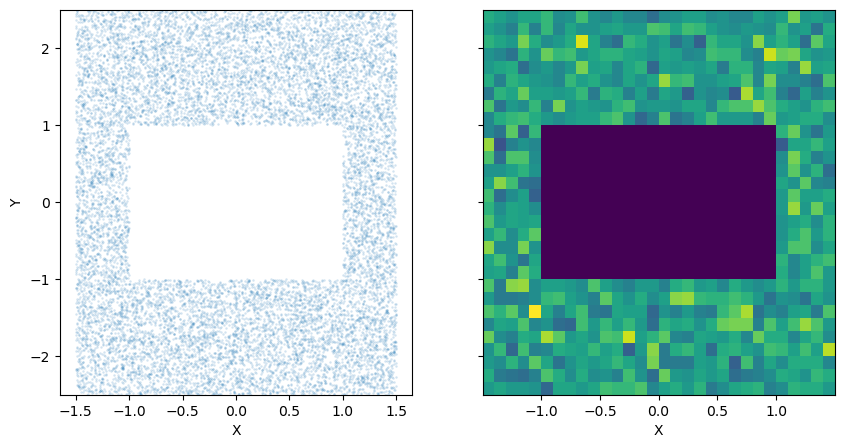

In [8]:
#version vectorisée, plus rapide, mais la taille de l'échantillon est aléatoire
def simulate_unif_in_F(n):
    X=np.random.uniform(-1.5,1.5,size=n)
    Y=np.random.uniform(-2.5,2.5,size=n)
    in_center =  (-1<X) & (X<1) & (-1<Y) & (Y<1)
    not_in_center=~in_center

    return X[not_in_center],Y[not_in_center]

X,Y=simulate_unif_in_F(20_000)
plot_simu(X,Y)

#### ♡♡♡


***À vous:*** Qu'en est-il si la figure $F$ est symétrique selon l'axe des ordonnées? ou selon une symétrie centrale?

### Matrice de covariance

***Définition:*** Considérons $Z$ un vecteur aléatoire à valeur dans $\mathbb R^n$. La matrice de covariance de $Z=(Z_i)$ c'est la matrice
$$
cov(Z)_{i,j} = cov (Z_i,Z_j)
$$
En particulier sur la diagonale
$$
cov(Z)_{i,i} = var (Z_i)
$$


## Estimation de la covariance


### Codons à la main



* $\mathbf E[X]$ est estimé par `mean(X)` (la moyenne des data `X`).
* $\mathbf E[Y]$ est estimé par `mean(Y)` (la moyenne des data `Y`).



La covariance $cov(X,Y)$ peut aussi être estimée avec les data:

    cov(X,Y) = 1/(n-1) sum_i (X[i]-mean(X))(Y[i]-mean(Y))

En particulier `cov(X,X)=std2(X)` est l'estimateur classique de la variance.

S'il vous plait, faites toujours la distinction entre les quantités que l'on estime à partir d'observations et les quantités théoriques. Si, quand vous rédigez, vous ne disposez pas de plusieurs polices, vous pouvez noter les estimateurs avec des tildes ou des chapeaux: $c\tilde ov$,  $c\hat ov$ pour les distinguer de la vraie covariance $cov$.


Implémentons la fonction qui renvoie l'estimation de la covariance:
    

In [9]:
def cov(X,Y):
    n=len(X)
    assert n==len(Y)
    X=X-np.mean(X)
    Y=Y-np.mean(Y)
    return X@Y/(n-1)

def test():
    np.random.seed(1234)#pour avoir toujours le même résultat
    X,Y=simulate_unif_in_F(100_000)
    print(cov(X,Y))


test()

-0.004445057951034018


Dans le test, on obtient une valeur proche de zéro... Et pas zéro exactement: il ne s'agit que d'une estimation!

#### $\heartsuit$

***À vous:*** Pourquoi est-ce que la variante suivante serait une très mauvaise idée:

    def cov(X,Y):
        n=len(X)
        assert n==len(Y)
        X-=np.mean(X)
        Y-=np.mean(Y)
        return X@Y/(n-1)


Réponse: Car l'opération `-=` est une opération <font color="red"> □ □ □ </font>. Notre fonction `cov` <font color="red"> □ □ □ </font>  les données de l'utilisateur.

### Sur l'exemple concret 2

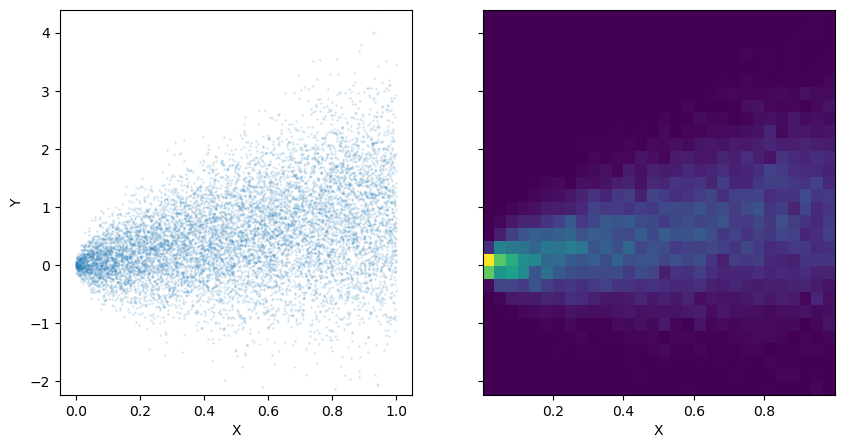

In [10]:
X,Y=simulate_concrete_2(10_000)
plot_simu(X,Y)

On a l'impression que $X$ et $Y$ sont légèrement corrélées positivement. Vérifions-le par notre estimation:

In [11]:
cov(X,Y)

0.08204585400122143

Autre façon de calculer: on considère le vecteur aléatoire $Z=(X,Y)$, on calcule sa matrice de covariance avec numpy, puis on prend un des deux coefficients non-diagonal.

In [12]:
def cov_np(X,Y):
    XY=np.stack([X,Y],axis=0)
    return np.cov(XY,ddof=1)[0,1]
cov_np(X,Y)

0.08204585400122148

## Un calcul exacte la matrice de covariance

Quand on travaille à des data récoltées dans la vraie vie, on n'a pas accès à leur loi, donc on n'a que des estimations de covariances, variances, espérances.


 Mais dans nos deux exemples concrets, le couple $(X,Y)$ a une loi jointe simple et explicite. On va pouvoir effectuer les calculs théoriques. On se concentrera sur l'exemple concert 2:

* $X$ suit une loi uniforme sur $[0,1]$
* Sachant $X=x$, la v.a $Y$ suit une loi normale de moyenne $x$ et d'écart type $\sqrt x$.

### Calcul de la co-variance

#### ♡♡♡



*  Calculons $\mathbf E[Y]$. Sachant $X=x$, la v.a $Y$ suit une loi normale de moyenne $x$, donc:
$$
\mathbf E[Y/X=x]= \color{red}{\square \square \square}
$$

---

En intégrant:
$$
\mathbf E[Y] =\int \mathbf E[Y/X=x] \mathbf P[X\in dx]  =
 \color{red}{\square \square \square}
$$

---

* Calculons $cov(X,Y)$.
$$
\mathbf E[XY/X=x] = \mathbf E[xY/X=x]= \color{red}{\square \square \square}
$$

---

En intégrant:
$$
\mathbf E[XY]= \color{red}{\square \square \square}
$$

---

Et pour conclure:
$$
cov(X,Y) =
\mathbf E[XY]-\mathbf E[X]\mathbf E[Y] = \color{red}{\square \square \square}
$$

À la fin, il faut présenter le résultat sous la forme d'une fraction irréductible.  


### Une erreur classique

Attention erreur classique: la variance d'une v.a ne s'obtient par en intégrant la variance conditionnelle. En particulier pour notre exemple:
$$
var(Y) \neq \int \mathbf E[ (Y-\mathbf E[Y/X=x])^2 /X=x ] \ \mathbf P[X\in dx]
=\int_0^1 x dx
$$
Pour comprendre pourquoi cela ne fonctionne pas, en développant le terme de droite, on tombe sur
$$
\int (\mathbf E[ Y^2/X=x ] - E[ Y/X=x ]^2)  \ \mathbf P[X\in dx]
=
\mathbf E[ Y^2] - \int  E[ Y/X=x ]^2 \mathbf P[X\in dx]
$$
L'équation de reconstruction ne permet pas de simplifier le dernier terme.

### Calcul des variances

#### ♡♡♡




* La variance de $X$ vaut $1/12$ car la variance d'une loi uniforme sur un intervalle [a,b] c'est $\color{red}{\square \square \square}$.

---

* Calculons la variance de $Y$: Pour une v.a $K$ de loi $N(a,\sigma^2)$ on a
$$
\mathbf E[K^2]=\sigma^2+a^2
$$
Dans notre cas, sachant $X=x$,  $Y$ suit une loi normale d'écart-type $\sqrt{x}$ et d'espérance $x$ donc:  
$$
\mathbf E[Y^2/X=x] = \color{red}{\square \square \square}
$$
En intégrant
$$
\mathbf E[Y^2] = \color{red}{\square \square \square}
$$
donc:
$$
var(Y) = \color{red}{\square \square \square}
$$



...


Comparons la vraie matrice de covariance et son estimation:

In [13]:
 true_cov=np.array([[...
true_cov

SyntaxError: '[' was never closed (464593967.py, line 1)

In [ ]:
#--- To keep following outputs, do not run this cell! ---

array([[0.08, 0.08],
       [0.08, 0.58]])

Comparons avec l'estimation:

In [ ]:
np.random.seed(134)
#On tire beaucoup de donnée pour avoir une bonne estimation
X,Y=simulate_concrete_2(100_000)
estimate_cov=np.cov(np.stack([X,Y],axis=0),ddof=1)
estimate_cov

## Correlations  de Pearson et spearman

### Pearson


> ***Définition:*** Le coefficient de corrélation de Pearson  est défini par:
$$
cor(X,Y) = { cov(X,Y)\over \sqrt{var(X)}\sqrt{var(Y)} }
$$

Remarquons que c'est une simple renormalisation de la covariance.  Cette correlation permet d'indiquer la relation entre $X$ et $Y$ indépendamment de leur magnitude. En particulier:


> ***Proposition:*** Pour toutes constantes $a,b$ on a:
$$
cor(a X, b Y) = cor(X,Y)
$$

#### ♡♡♡

***À vous:*** Démontrez cette proposition et, chemin faisant, vous allez voir qu'il manque une hypothèse très importante pour qu'elle soit vraie. Corriger l'énoncé.



> ***Proposition:*** Le coefficient de corrélation est toujours dans l'intervalle $[-1,1]$.

#### ♡♡


*Démonstration:* C'est une conséquence immédiate de l'inégalité de <font color="red"> □ □ □ </font> $\square$

In [ ]:
#reprenons l'exemple l'exemple, calculons la corrélation
X,Y=simulate_concrete_2(50000)
Z=np.stack([X,Y],axis=0)

In [ ]:
np.corrcoef(Z)#Dans cette fonction, pas d'argument ddof. Tant pis.

#### ♡♡

La corrélation se trouve sur la non-diagonale. Pourquoi d'après vous n'y a-t-il pas d'argument `ddof` dans la fonction `np.corrcoef`? Alors que cet argument est présent dans `np.cov`.  



On peut aussi utiliser `scipy` pour calculer ce coefficient:

In [ ]:
scipy.stats.pearsonr(X, Y)

 `scipy` donne aussi une p-value: la p-value du test de student sur la nullité de ce coefficient. Quand cette p-value  est  petite (inférieure `1e-3`),  cela indique que ce coefficient est significativement différent de zéro.

#### ♡

En utilisons nos calculs théoriques précédents pour calculer le vrai coefficient de corrélation de l'exemple concret 2.

In [ ]:
 Faites un petit calcul qui donne une valeur numérique de la vrai valeur de la corrélation.


In [ ]:
#--- To keep following outputs, do not run this cell! ---

0.3779644730092272

Une corrélation à 37%: c'est pas mal.  $X,Y$ sont fortement corrélée; ce qui ne se voyait pas bien avec la covariance qui était de l'ordre de 0.08


###  Corrélations extrèmes

Le coefficient de corrélation (de Pearson) entre deux variables $X$ et $Y$ mesurent à quel point $Y$ est proche d'une fonction affine de $X$. Les valeurs extrèmes $+1$ et $-1$ de ces corrélations indiquent des relations purement affines:

> ***Proposition:***
* $cor(X,Y) = 1$  ssi $Y = aX+b$ avec $a > 0$.
* $cor(X,Y) = -1$ ssi $Y = aX+b$ avec $a < 0$

*Démonstration dans un sens:* On fait seulement le sens facile: Montrons que si $Y = aX+b$ avec $a > 0$ alors  $cor(X,Y) = 1$:

Supposons donc que $Y = aX+b$ avec $a>0$.   On a:
$$
cov(X,Y) = cov(X,aX+b)= cov(X,aX) =  a \,
 cov(X,X) = a \, var(X)
$$
Tandis que

<font color='red'> Finir</font>



Cette proposition a un équivalent pour les estimateurs: Notons maintenant $\mathtt X,\mathtt Y$ des échantillons:
* $\mathtt{cov (X,Y)} = 1$ ssi $\forall i: \mathtt Y_i = a \mathtt X_i+b$ avec $a>0$.
* $\mathtt{cov (X,Y)} = 1$ ssi $\forall i: \mathtt Y_i = a \mathtt X_i+b$ avec $a < 0$.

### Spearman

Introduisons maintenant le coefficient de corrélation de Spearman $spear(X,Y)$ et son estimateur $\mathtt {spear(X,Y)}$. Elles vérifient:


* ${spear (X,Y)} = 1$ ssi $ Y = f(X)$ pour une fonction $f$ croissante.
* ${spear (X,Y)} = -1$ ssi $ Y = f(X)$ pour une fonction $f$ décroissante.

* $\mathtt{spear (X,Y)} = 1$ ssi $\forall i: \mathtt Y_i = f( \mathtt X_i)$ pour une fonction $f$ croissante.
* $\mathtt{spear (X,Y)} = -1$ ssi $\forall i: \mathtt Y_i = f( \mathtt X_i)$ pour une fonction $f$ décroissante.


Comment est-ce possible? Très simplement: Spearman c'est Pearson que l'on calcule à partir du rang des observations (= leur ordre quand on les classe par ordre croissant).  

Observons ce calcul.  

In [ ]:
size=30

In [ ]:
X=np.random.uniform(0,10,size=100)
Y=np.random.normal(loc=np.exp(X),scale=X)

In [ ]:
plt.plot(X,Y,".");

Calculons Pearson:

In [ ]:
#méthode 1
XY=np.stack([X,Y],axis=0)
print(np.corrcoef(XY)[0,1])

In [ ]:
#méthode 2:
scipy.stats.pearsonr(X, Y)[0]

On voit que ces deux variables sont extrêmement corrélées au sens français du terme. Le coefficient de Pearson est assez grand (70% environ) mais au vu de la dépendance observée, on aimerait un coefficient encore plus proche de sa valeur maximale: 1. Ça sera le cas du coefficient de corrélation de Spearman.

Observons les rangs des observations

In [ ]:
# rank of x's
X_ranks = scipy.stats.rankdata(X)
# rank of y's
Y_ranks = scipy.stats.rankdata(Y)

La fonction `np.argsort` renvoie aussi les rangs; mais c'est bien `scipy.stats.rankdata` qu'il faut utiliser pour Spearman.

#### ♡♡♡♡

*** À vous:***   Faites des petits tests pour expliquer quelle sont les 2 différences entre `np.argsort` et `scipy.stats.rankdata`. Aide: regarder notamment quand il y a des égalités.

In [ ]:
plt.plot(X_ranks,Y_ranks,".");

On voit qu'ils sont très corrélés linéairement. Le coef de Pearson des rangs (=le coef de Spearman) va renvoyer un nombre très proche de 1.


In [ ]:
def compute_spearman(X,Y):
    X_ranks = scipy.stats.rankdata(X)
    Y_ranks = scipy.stats.rankdata(Y)
    XY_ranks=np.stack([X_ranks,Y_ranks],axis=0)
    return np.corrcoef(XY_ranks)[0,1]

In [ ]:
my_speareman=compute_spearman(X,Y)
my_speareman

In [ ]:
#comparons avec ce que renvoie scipy directement:
scipy.stats.spearmanr(X, Y)[0]

Si on remplace `[0]` par `[1]` dans le code ci-dessus, on trouve la p-value du test de Student sur la nullité du coefficient de Spearman.

## Droite de régression et ACP.


### Droite affine de régression

On cherche la droite affine qui approxime au mieux nos données, on cherche donc:
$$
 \hat a,\hat b= \text{argmin}_{a,b}\   \sum_i (\mathtt Y_i - a \mathtt X_i -b)^2
$$

> ***Proposition:*** On a:
> \begin{align}
\hat a&=\mathtt{ {cov(X,Y)\over var (X)} }\\
\hat b&= \mathtt{mean}(\mathtt Y) + \hat a \, \mathtt{mean}(\mathtt X)
\end{align}




*Démonstration:* Il est très clair que si l'on translate les données alors, on translate la droite de régression (c'est simplement un changement d'origine). En particulier: notons
$$
loss(\mathtt  X,\mathtt Y) = \sum_i (\mathtt Y_i - a \mathtt X_i -b)^2
$$
la fonction objective. Si $\hat a,\hat b$ sont les minimiseurs cette loss, alors, pour une constante $k$, les minimiseurs de $loss(\mathtt  X - k,\mathtt Y)$ sont $\hat a,\hat b - \hat a k$ (ce sont les paramètres de la droite quand on fait une translation de l'origine).

En notant $k=\text{mean}(\mathtt{X})$, et en soustrayant cette quantité à $\mathtt{X}$, on peut supposer que $\sum_i \mathtt{X}_i=0$ ce qui va grandement simplifier les calculs.

Notons $n$ la taille de nos data. Notons $\mathbf X$ la matrice dont la première colonne est composée de 1, et la seconde contient les $\mathtt{X}_i$. Notons $\mathbf Y$ la matrice colonne qui contient les  $\mathtt{Y}_i$. "L'équation normale" donne:
$$
 \begin{pmatrix}
 \hat b \\
 \hat a
 \end{pmatrix}
=(\mathbf X^T  \mathbf X)^{-1}\mathbf X^T\mathbf Y
$$
La matrice $\mathbf X^T  \mathbf X$ est donnée par
$$
\begin{pmatrix}
n &\sum_i \mathtt{X}_i\\
\sum_i \mathtt{X}_i&\sum_i \mathtt{X}^2_i
\end{pmatrix}
=
\begin{pmatrix}
n &0\\
0&\sum_i \mathtt{X}^2_i
\end{pmatrix}
$$
Dont l'inverse est facile à calculer. Et on trouve
$$
\begin{pmatrix}
 \hat b \\
 \hat a
 \end{pmatrix}
 =
\begin{pmatrix}
\frac 1n \sum_i \mathtt{Y}_i \\
{\sum_i \mathtt{X}_i\mathtt{Y}_i  \over \sum_i \mathtt{X}^2_i}
\end{pmatrix}
=
\begin{pmatrix}
\mathtt{mean} (\mathtt Y) \\
{ \mathtt{cov(X) } \over  \mathtt{var(X)}}
\end{pmatrix}.
$$
Nous avons fini la preuve dans le cas où $\sum_i \mathtt{X}_i=0$. Le cas général découle de la discussion en début de preuve. $\square$

### Droite vectorielle de régression

Très souvent, on a envie d'expliquer l'effet de $X$ sur $Y$ de la manière la plus simple possible: par exemple pour des appartements, on parle de "prix au mètre carré" ($X$=surface, $Y$=prix). On cherche donc le coefficient:
$$
 \hat c = \text{argmin}_{c}\  \sum_i (\mathtt Y_i - c \mathtt X_i)^2
$$

> ***Proposition:*** On a:
> \begin{align}
\hat c&=\mathtt{ {\sum_i \mathtt X_i \mathtt Y_i \over \sum_i \mathtt X^2_i } }
\end{align}

Remarque: Quand les données sont centrée, on a $\hat b=0$ et $\hat a=\hat c$: les droites de regression affine et  vectorielle coïncident.

#### $\heartsuit\heartsuit\heartsuit$

Démontrez cette proposition en utilisant l'équation normale. Mais cette fois-ci, la matrice $\mathbf X^T  \mathbf X$ est de taille 1*1. Très simple!

### Droites de régression: le programme



In [ ]:
def plot_regression_lines(X,Y):
    fig,ax=plt.subplots()
    ax.scatter(X,Y,s=3,label="point")

    a=cov(X,Y) / np.std(X)**2
    b=np.mean(Y)  - a*np.mean(X)
    c=sum(X*Y)/sum(X**2)

    left,right=min(X),max(X)
    xx=np.linspace(left,right,2)
    ax.plot(xx,a*xx+b,"r",label="regression affine")
    ax.plot(xx,c*xx,"b",label="regression vectorielle")
    ax.legend()

In [ ]:
X,Y=simulate_concrete_2(500)
plot_regression_lines(X,Y)

Les deux droites ont l'air très proches. Mais modifions un peu les données:

In [ ]:
X,Y=simulate_concrete_2(500)
X=X-1
Y=Y+2
plot_regression_lines(X,Y)

Pour ces data, la droite vectorielle semble être dans les choux.

### La droite d'ACP

Voici toute ce qu'il faut savoir sur l'ACP (Analyse en composante principale) pour un ensemble de points $\mathtt Z$. On utilisera ce résultat en 2D pour nos point $\mathtt{Z=(X,Y)}$, mais ce qui suit est vrai en toute dimension.

* La matrice de covariance $\mathtt{cov(Z)}$ est symétrique définie positive, donc diagonalisable dans une base orthonormale.
* Ses valeurs propres sont positives. On les ordonne les valeurs propres par ordre décroissant: $\lambda_0$ est la plus grande. Notons $U_0$ le vecteur propre correspondant.
* La droite passant par le barycentre de $\mathtt Z$  et engendrée par $U_0$ donne la "direction principale" du nuage de point: parmi toutes les droites, c'est la droite qui minimise la distance avec les points.
* Conséquence logique: Quand on projette les points sur cette droite, on obtient la projection qui a la plus grande variance (comparée aux autres projections possibles sur des droites).
* La variance des points projetés, c'est $\lambda_0$.  

Techniquement, la procédure `svd` permet de faire la diagonalisation avec la matrice de passage bien ordonnée.

In [ ]:
X,Y=simulate_concrete_1(5000)
cov_mat=np.cov(np.stack([X,Y],axis=0),ddof=1)
cov_mat

In [ ]:
def compute_m_with_svd(X,Y):
    cov_mat=np.cov(np.stack([X,Y],axis=0),ddof=1)

    #Le vecteur S contient les valeurs propres ordonnées de la plus grande à la plus petite.
    #U est la matrice de passage. Les colonnes de U sont ordonnées pour que la première colonne corresponde à la plus grande valeur propre.
    U,S,_=np.linalg.svd(cov_mat)
    U0=U[:,0]
    m=U0[1]/U0[0]
    return m

In [ ]:
compute_m_with_svd(X,Y)

In [ ]:
def plot_both_line(X,Y):
    mean_X=np.mean(X)
    mean_Y=np.mean(Y)

    a=cov(X,Y) / np.std(X)**2
    b=np.mean(Y)  - a*np.mean(X)

    m=compute_m_with_svd(X,Y)

    fig,ax=plt.subplots()
    ax.scatter(X,Y,s=3,label="point")
    left,right=min(X),max(X)
    xx=np.linspace(left,right,100)

    ax.plot(xx,a*xx+b,"r",label="regression line")
    ax.plot(xx,m*(xx-mean_X)+mean_Y,"g",label="ACP line")

    ax.scatter(mean_X,mean_Y,s=20,c="k",label="mean")
    #ax.scatter(0,0,label="origin")
    ax.legend()

In [ ]:
X,Y=simulate_concrete_1(500)
X+=2
Y-=-3
plot_both_line(X,Y)

In [ ]:
X,Y=simulate_concrete_2(500)
X+=4
Y-=6
plot_both_line(X,Y)

### Quelle droite choisir ?

La droite d'ACP (verte) est "au plus proche" des points: Si vous projetez tous les points orthogonalement sur la droite ACP, vous obtenez une distance bien plus petite que si vous faites cette même opération avec la droite de regression (rouge).


Par contre la droite de regression permet d'approcher une relation de causalité bruité $Y=f(X)+bruit$. Dans le dernier exemple tracé, on aurait plutôt envi d'utiliser la droite de regression: graphiquement on imagine une relation $Y=f(X)+bruit$ avec le bruit qui augmente quand $x$ grandit.


### Exemple de mauvaise interprétation

In [ ]:
loi=scipy.stats.multivariate_normal([0., 0.], [[2.0, 0.3], [0.3, 1.5]])

In [ ]:
Z=abs(loi.rvs(size=1000)+3)
Z.shape

`Z` est une matrice contenant des scores représentant le niveau mathématique d'une personne.

Chaque ligne de `Z` correspond à un couple. La première colonne représente le score de l'homme, la seconde le score de la femme.

on va mettre les hommes en abscisse et les femmes en ordonnées.

In [ ]:
plot_simu(Z[:,0],Z[:,1])

Notons $\Delta$ la droite $y=x$ (=la première bissectrice).

* Les points sur $\Delta$ correspondent aux couples où les deux conjoints ont le même niveau en math.
* Les points au-dessus de $\Delta$ correspondent au couple où la femme est la plus forte.
* Les points en-dessous de $\Delta$ correspondent au couple où l'homme est le plus fort.

Il semble donc pertinent le tracer la droite de regression vectorielle de nos points, puis de la comparer avec $\Delta$.

In [ ]:
def plot_delta_and_regression(X,Y,xlabel,ylabel):
    fig,ax=plt.subplots()
    ax.scatter(X,Y,s=3)
    c=np.sum(X*Y)/np.sum(X**2)
    xx=np.linspace(min(X),max(X),10)
    ax.plot(xx,c*xx,"r",label="regression vectorielle")
    ax.plot(xx,xx,"k:",label="delta")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_aspect("equal")
plot_delta_and_regression(Z[:,0],Z[:,1],"homme","femme")

Le graphique parle de lui-même: la droite rouge est sous $\Delta$, donc les hommes sont en majorité plus fort que les femmes en math.

Mais que ce passe-t-il si on met les femmes en abscisse et les hommes en ordonnée:

In [ ]:
plot_delta_and_regression(Z[:,1],Z[:,0],"femme","homme")

Mince, finalement, ce sont les femmes les plus fortes!

Cet apparent paradoxe vient du fait que la droite de regression minimise les projections verticales. Et ce n'est pas du tout symétrique si on échange $X$ et $Y$. Par contre, la droite d'ACP n'a pas ce problème:

### La bonne droite

On force la droite d'ACP à passer par zéro avec une astuce que vous pouvez lire dans le code ci-dessous.

In [ ]:
def plot_delta_and_acp_from_0(X,Y,xlabel,ylabel):
    fig,ax=plt.subplots()
    XX=np.append(X,-X)
    YY=np.append(Y,-Y)
    mm=compute_m_with_svd(XX,YY)


    ax.scatter(X,Y,s=3)


    xx=np.linspace(min(X),max(X),10)
    ax.plot(xx,mm*xx,"r",label="regression vectorielle")
    ax.plot(xx,xx,"k:",label="delta")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_aspect("equal")

plot_delta_and_acp_from_0(Z[:,0],Z[:,1],"homme","femme")

In [ ]:
plot_delta_and_acp_from_0(Z[:,1],Z[:,0],"femme","homme")

La droite rouge est proche de $\Delta$. Pas de différence notable.

Notons aussi qu'il est dangereux de résumer à une droite une discribution de point qui ne ressemble pas à une droite.

## Des p'tits calculs sympas

### Deux variables binaires




Supposons que $X$ et $Y$ prennent leurs valeurs dans $\{0,1\}$, ainsi $X=1_{X=1}$ et donc
$$
\mathbf E[X] = \mathbf P[X=1]:=p_X
$$
$$
var(X)= p_X(1-p_X)
$$
Idem pour $Y$.


Pour comprendre l'influence de $X$ sur $Y$ il est naturel de comparer $\mathbf P[Y=1/X=1]$ avec $\mathbf P[Y=1]$. Il est donc naturel de calculer le ratio:
$$
{\mathbf P[Y=1/X=1]\over \mathbf P[Y=1]}
$$

> ***Proposition***
$$
 {\mathbf P[Y=1/X=1]\over \mathbf P[Y=1]}
={cov(X,Y) \over p_Xp_Y} +1
=cor(X,Y){ \sqrt{(1-p_X)(1-p_Y)}\over \sqrt{p_Xp_Y}} +1
$$


La formule est naturelle.




#### ♡♡

Démonstration:

C'est à vous de la faire


### Retours mathématiques sur les pieds et les notes






On modélise l'âge des enfant du primaire par une v.a $A$ à valeur dans $6,7,8,9,10,11$.


On modèlise la note en math par
$$
X = f(A) + \epsilon
$$
où $f$ et une fonction croissante et $\epsilon$ un bruit centré.


On modèlise la taille du pied par
$$
Y = g(A) + \epsilon'
$$
où $g$ et une fonction croissante et $\epsilon'$ un bruit centré.


On a bien un lien de causalité (bruité) de $A$ vers $X$ et de $A$ vers $Y$. Mais pas de $Y$ vers $X$ comme la phrase du directeur laissée entendre. Mais on a bien une corrélation, et même:





***Proposition:*** La note $X$ et la taille du pied $Y$ sont corrélés positivement.


*Démonstration:* On va simplement montrer que la covariance et positive. Les bruits étant centrés et indépendants de toute le monde on vérifie facilement que
$$
cov(X,Y) = cov(f(A),g(A))
$$
Considérons $A'$ une copie indépendante de $A$. Considérons la quantité
$$
e=\mathbf E[(f(A)-f(A'))(g(A)-g(A'))]
$$

* D'une part nous avons que $e\geq 0$. En effet, il suffit de séparer cette espérence en deux bouts:
$$
e=\mathbf E[1_{A>A'} ... ] + \mathbf E[1_{A\leq A'} ... ]
$$
en utlisant la croissante de $f$ et $g$, les deux bouts sont positifs.


* D'autres part, en développant le produit, on voit que $e = 2 cov(f(A),g(A)) $



#### ♡♡♡

***A vous:*** Rajouter des détails dans cette preuve pour bien la comprendre, notamment, faite le développement de $e$ pour le second points.